# Analise de vendas de carros

In [1]:
import pandas as pd

In [2]:
alucar = pd.read_csv('dados/alucar.csv')

In [3]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
alucar.shape

(24, 2)

In [5]:
print(f'Quantidade de dados nulos: {alucar.isna().sum()}')

Quantidade de dados nulos: mes       0
vendas    0
dtype: int64


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
import seaborn as sns

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

In [10]:
print(sns.__version__)

0.13.2


<Axes: xlabel='mes', ylabel='vendas'>

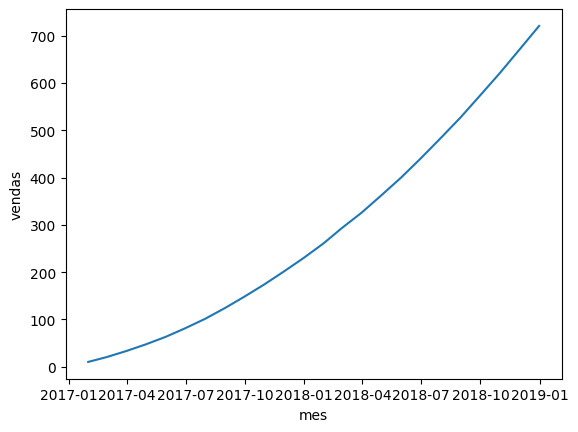

In [11]:
sns.lineplot(x='mes', y='vendas', data=alucar)

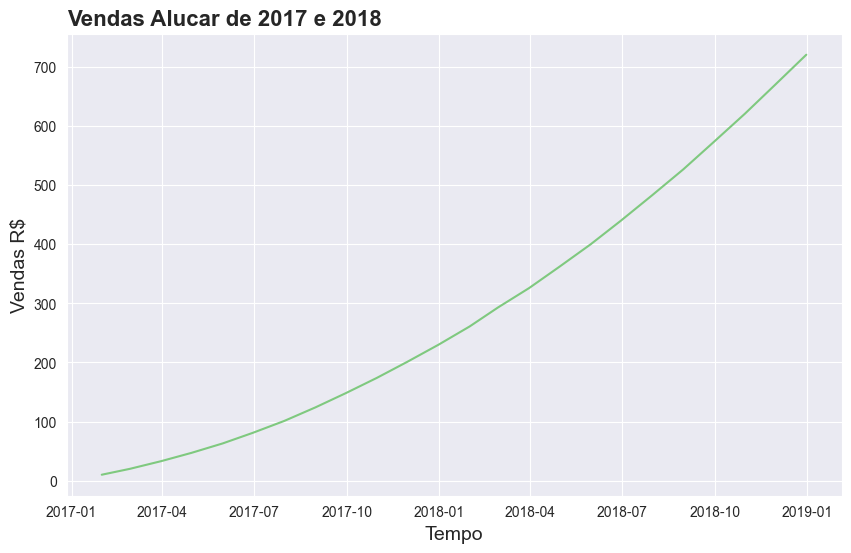

In [12]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(10,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=16, weight='bold')
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas R$', fontsize=14)
ax = ax

In [13]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


## Decomposição das vendas

In [14]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


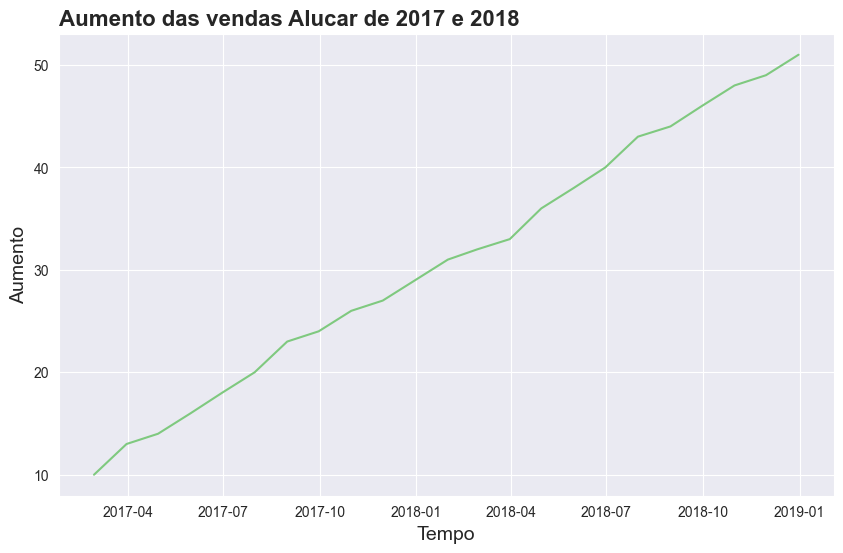

In [15]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(10,6)
ax.set_title('Aumento das vendas Alucar de 2017 e 2018', loc='left', fontsize=16, weight='bold')
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

Criando uma função para plotar gráficos

In [16]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')

    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(10,6)
    ax.set_title(titulo, loc='left', fontsize=16, weight='bold')
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

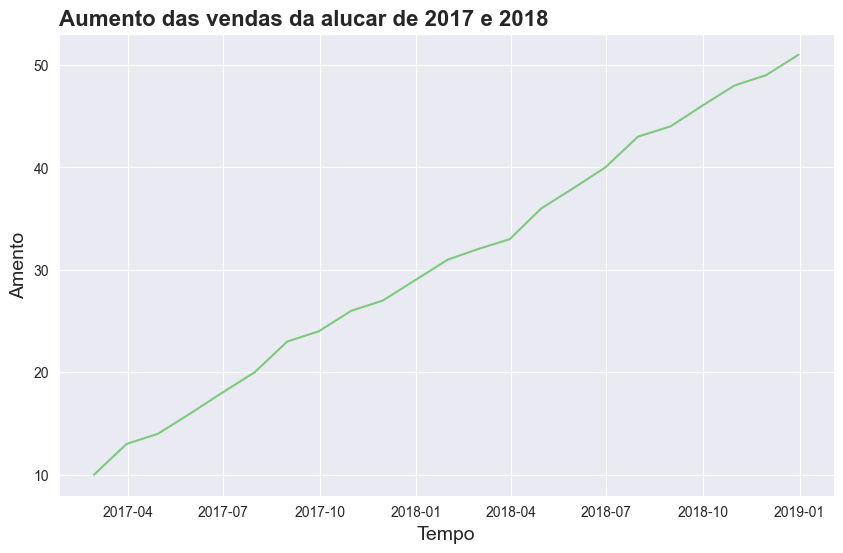

In [17]:
plotar('Aumento das vendas da alucar de 2017 e 2018', 'Tempo', 'Amento',
       'mes', 'aumento', alucar)

Decompondo novamente o dataset

In [18]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


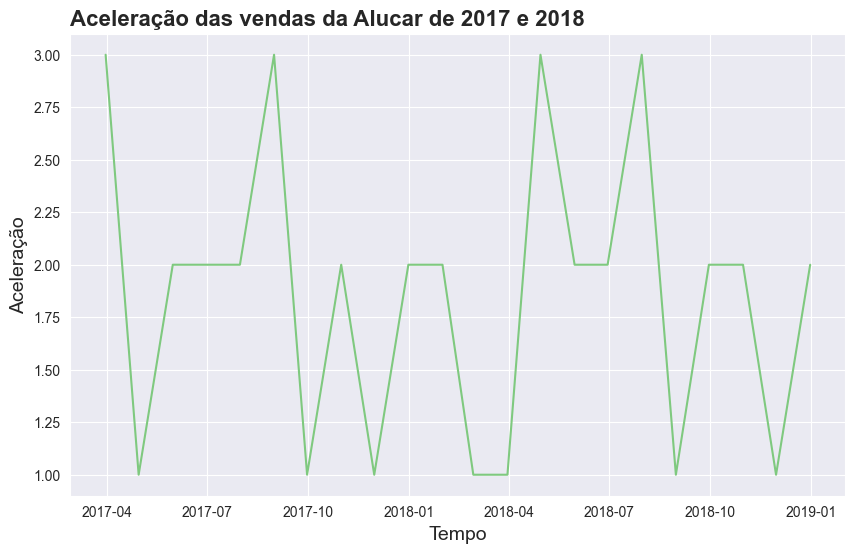

In [19]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

In [20]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    
    plt.figure(figsize=(14,12))

    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=16, loc='left', weight='bold')
    sns.lineplot(x=x, y=y1, data=dataset)

    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)

    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

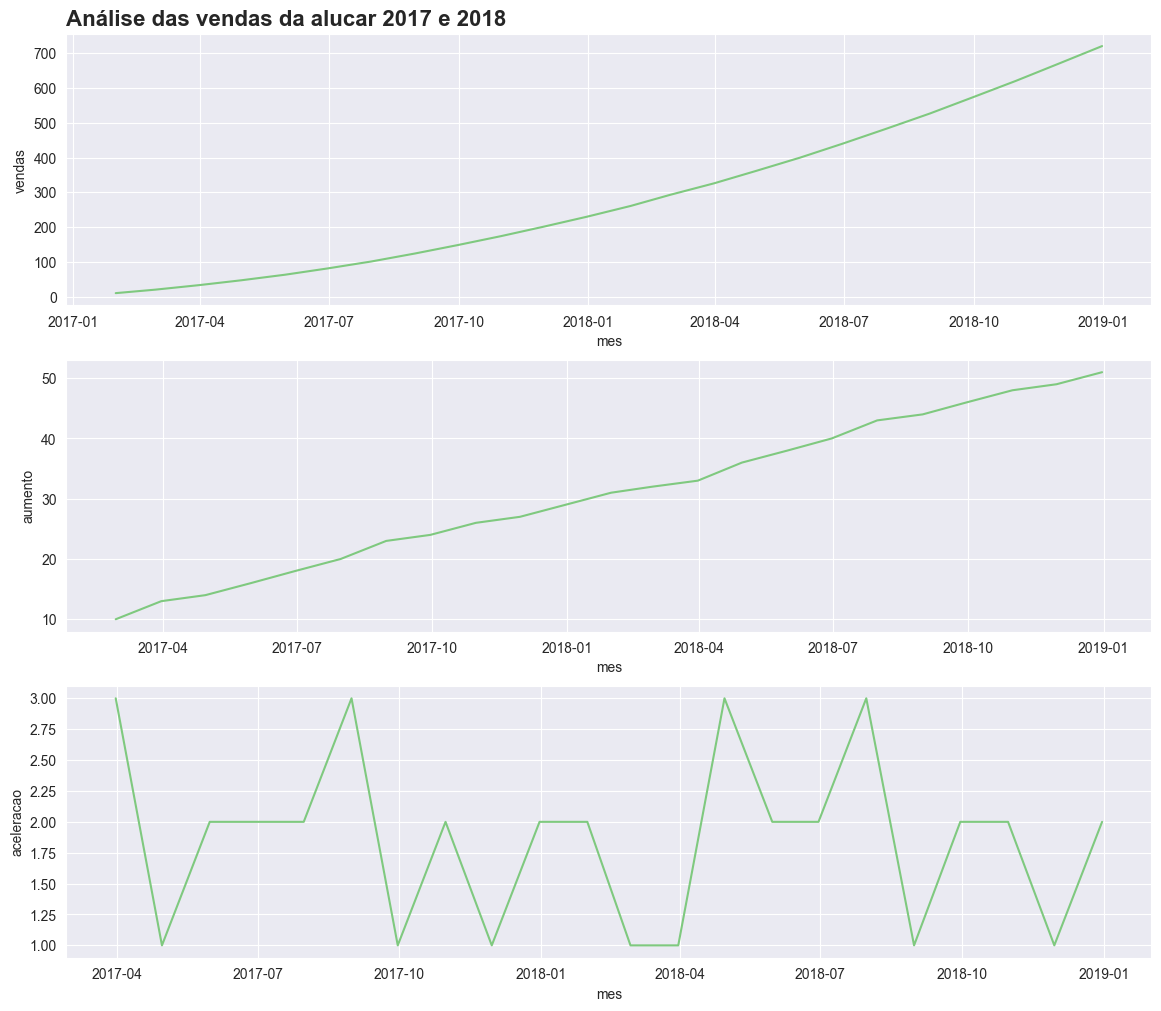

In [21]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise das vendas da alucar 2017 e 2018')

## Autocorrelação

In [22]:
from pandas.plotting import autocorrelation_plot

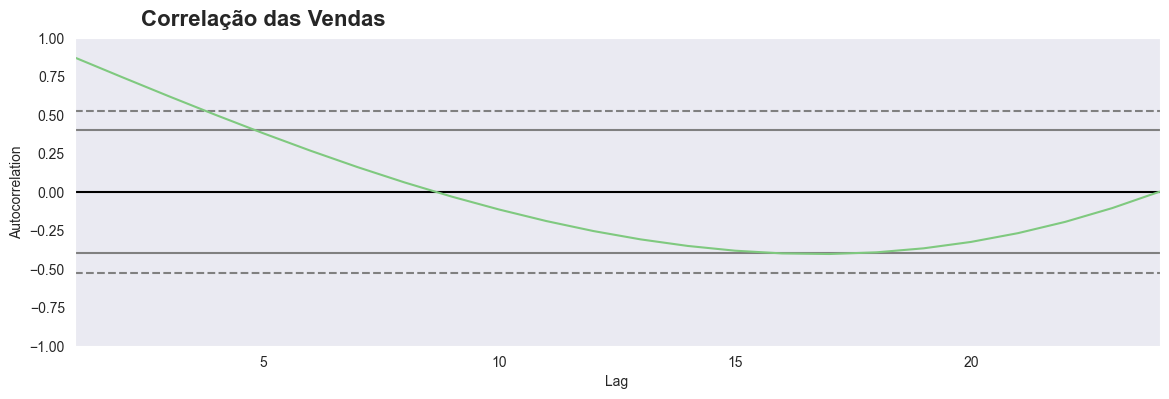

In [23]:
ax = plt.figure(figsize=(14,4))
ax.suptitle('Correlação das Vendas', fontsize=16,weight = 'bold', x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax 

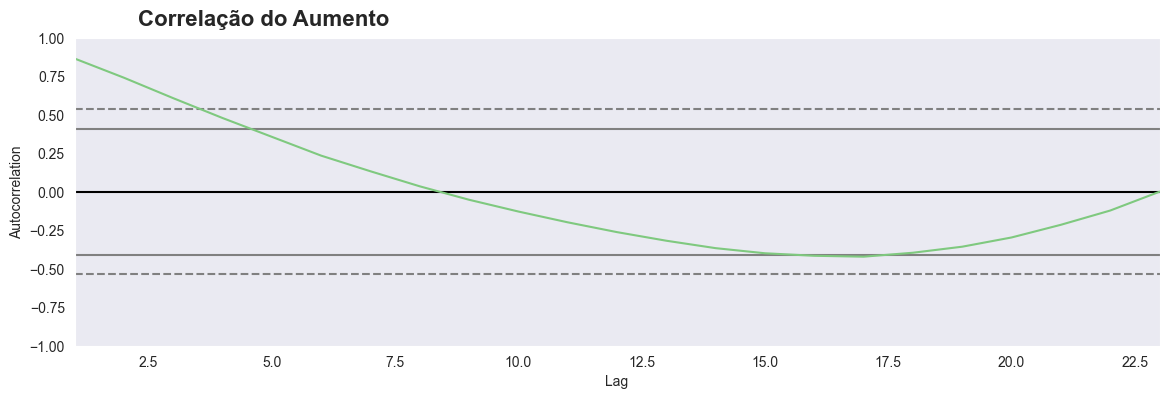

In [24]:
ax = plt.figure(figsize=(14,4))
ax.suptitle('Correlação do Aumento', fontsize=16, weight = 'bold', x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax 

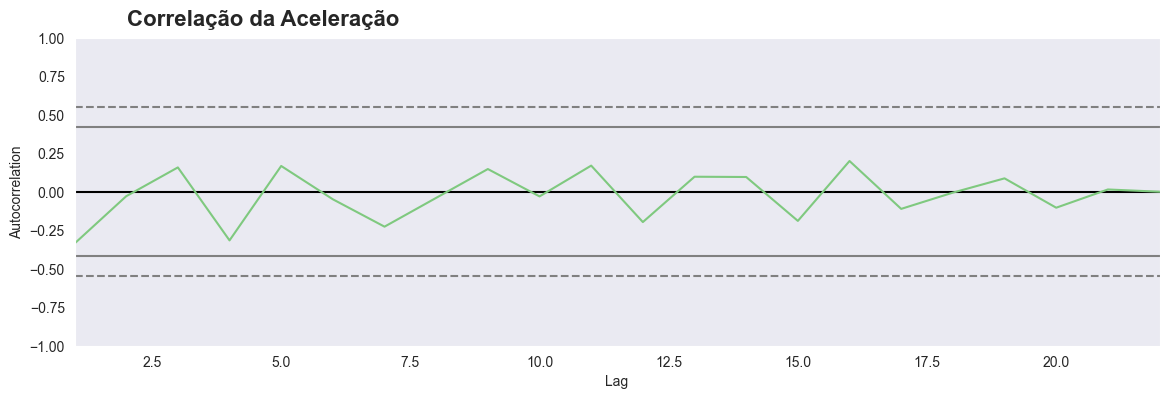

In [25]:
ax = plt.figure(figsize=(14,4))
ax.suptitle('Correlação da Aceleração', fontsize=16, weight = 'bold', x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax 

# Analise de assinaturas da newsletter

In [26]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [27]:
assinantes.shape

(24, 2)

In [28]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [29]:
assinantes.isna().sum()

mes           0
assinantes    0
dtype: int64

In [30]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [31]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


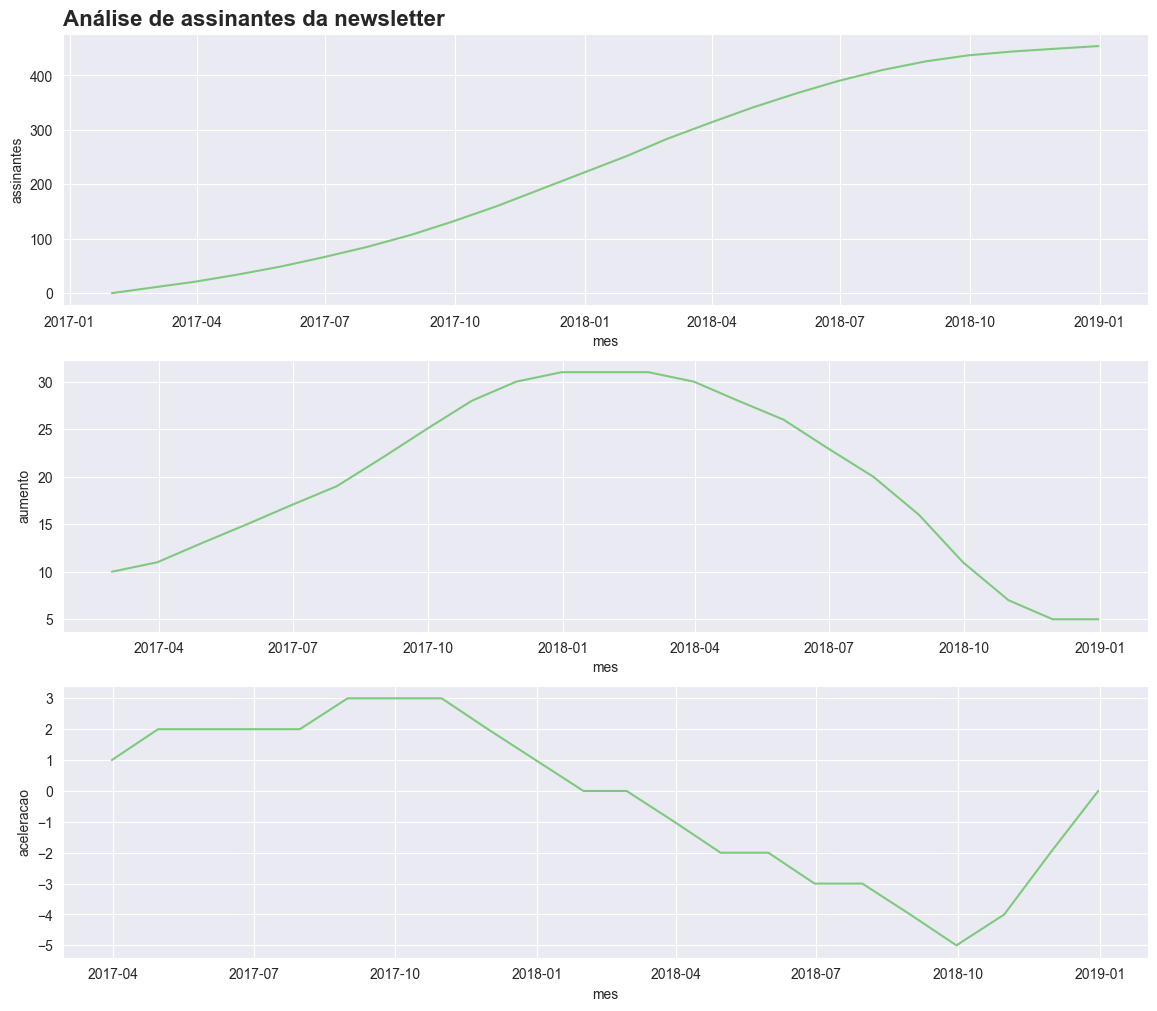

In [32]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', 
                assinantes, 'Análise de assinantes da newsletter')

# Análise de vendas de chocolate

In [33]:
chocolate = pd.read_csv("dados/chocolura.csv")
chocolate.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [34]:
chocolate.dtypes

mes       object
vendas     int64
dtype: object

In [35]:
chocolate['mes'] = pd.to_datetime(chocolate['mes'])
chocolate.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [36]:
print(f'Quantidade de linhas e colunas: {chocolate.shape}')
print(f'Quantidade de dados nulos: {chocolate.isna().sum().sum()}')

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [37]:
chocolate['aumento'] = chocolate['vendas'].diff()
chocolate['aceleracao'] = chocolate['aumento'].diff()
chocolate.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


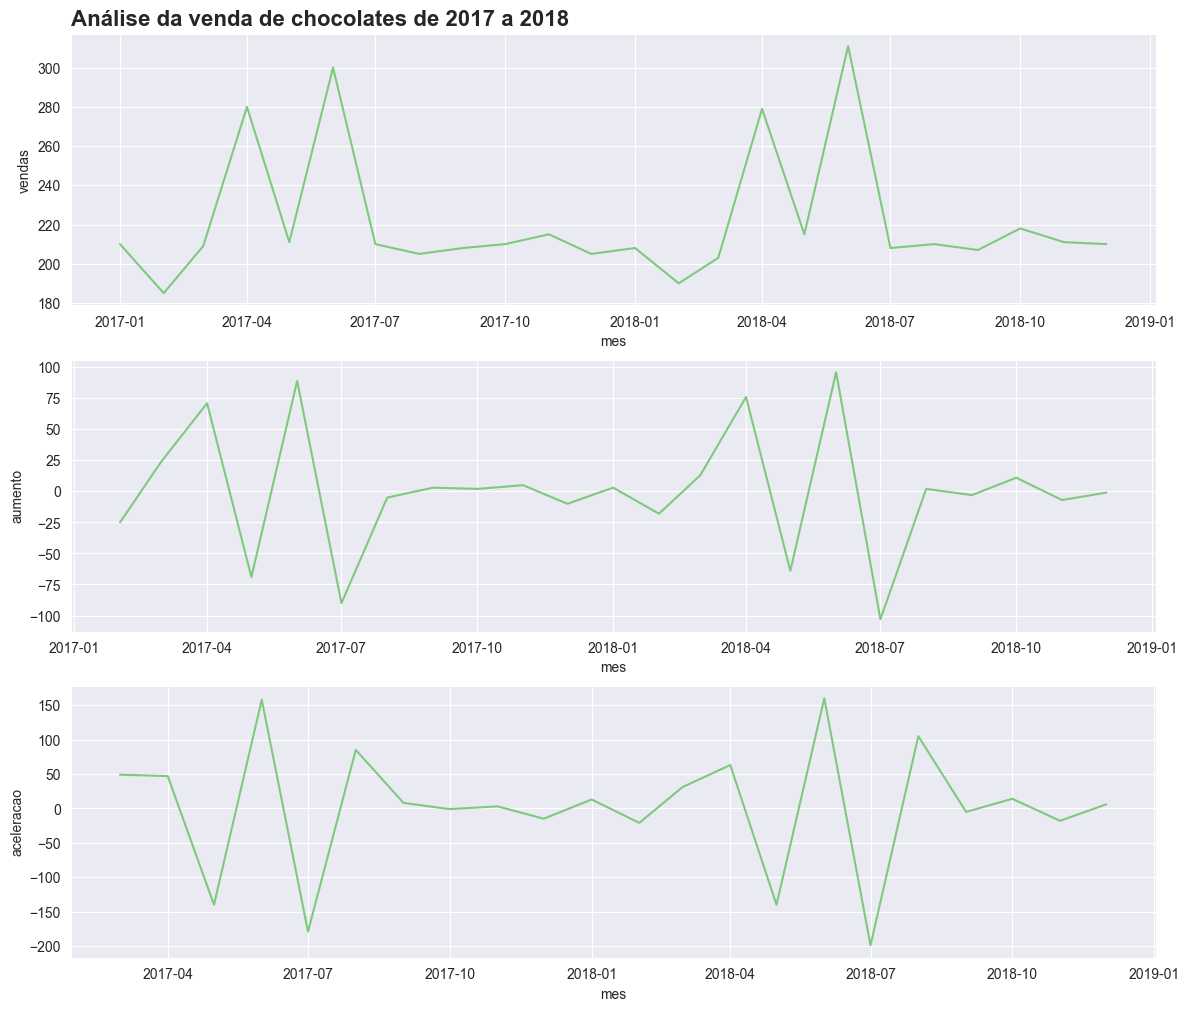

In [38]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', 
                chocolate, 'Análise da venda de chocolates de 2017 a 2018')

## Vendas diárias de chocolate (Outubro e Novembro)

In [39]:
vendas_por_dia = pd.read_csv('dados/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [40]:
print(f'Quantidade de linhas e colunas: {vendas_por_dia.shape}')
print(f'Quantidade de dados nulos: {vendas_por_dia.isna().sum().sum()}')

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [41]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [42]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [43]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


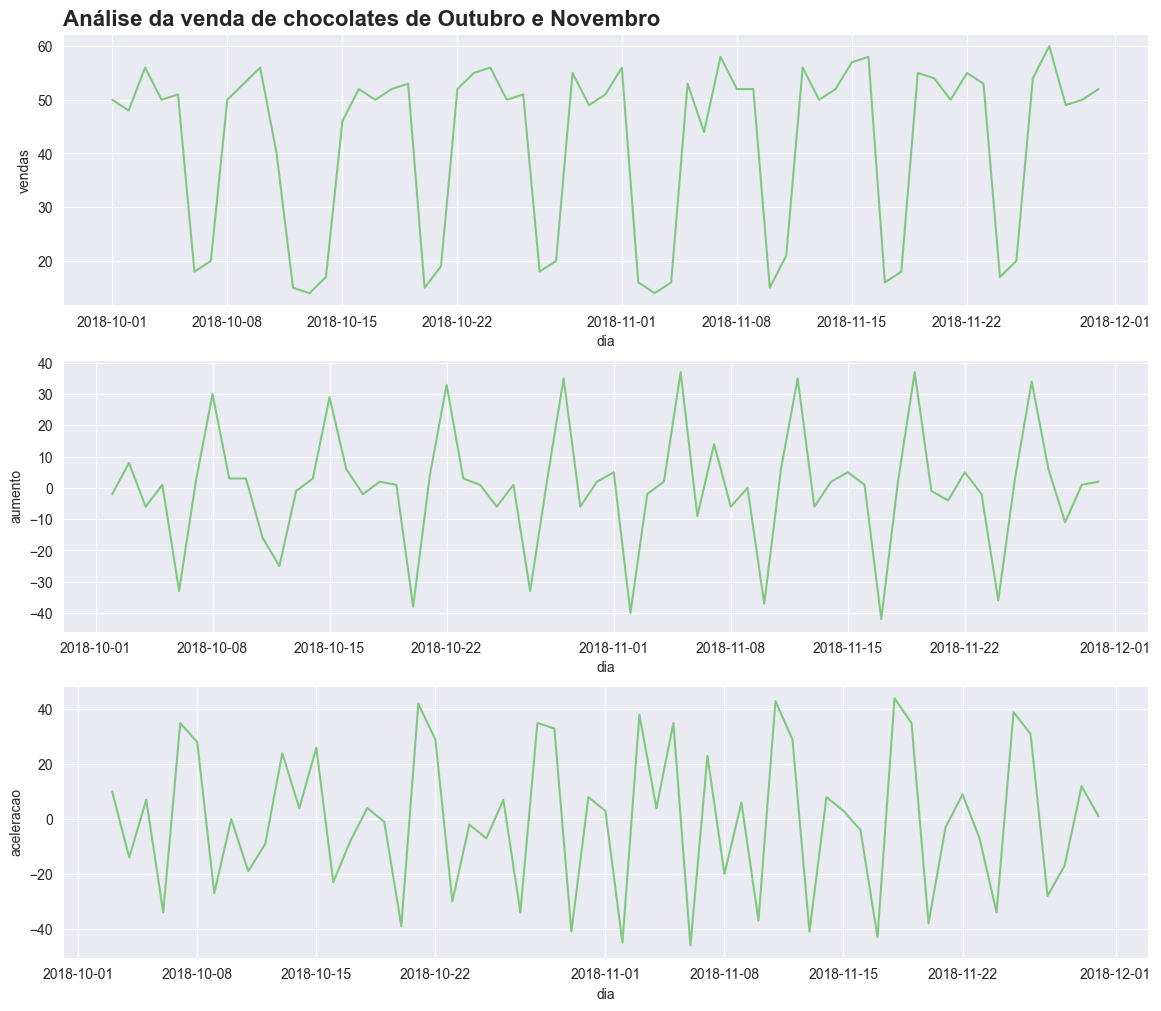

In [44]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', 
                vendas_por_dia, 'Análise da venda de chocolates de Outubro e Novembro')

## Analisando a Sazonalidade

In [45]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [46]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [47]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [48]:
dias_portugues = {'Monday': 'segunda',
                  'Tuesday': 'terça', 
                  'Wednesday': 'quarta',
                  'Thursday': 'quinta', 
                  'Friday': 'sexta', 
                  'Saturday': 'sabado',
                  'Sunday': 'domingo'}

In [49]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_portugues)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,segunda
1,2018-10-02,48,-2.0,NaN,terça
2,2018-10-03,56,8.0,10.0,quarta
3,2018-10-04,50,-6.0,-14.0,quinta
4,2018-10-05,51,1.0,7.0,sexta


In [50]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,segunda
1,2018-10-02,48,-2.0,NaN,terça
2,2018-10-03,56,8.0,10.0,quarta
3,2018-10-04,50,-6.0,-14.0,quinta
4,2018-10-05,51,1.0,7.0,sexta
5,2018-10-06,18,-33.0,-34.0,sabado
6,2018-10-07,20,2.0,35.0,domingo
7,2018-10-08,50,30.0,28.0,segunda
8,2018-10-09,53,3.0,-27.0,terça
9,2018-10-10,56,3.0,0.0,quarta


## Agrupando os dias

In [51]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()

In [52]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
domingo,19.0,3.0,31.0
quarta,53.0,1.0,2.0
quinta,51.0,-2.0,-3.0
sabado,16.0,-28.0,-20.0
segunda,52.0,34.0,31.0
sexta,45.0,-7.0,-5.0
terça,52.0,-1.0,-34.0


As quedas de venda ocorrem sempre no final de semana

**Correlação das vendas diárias**

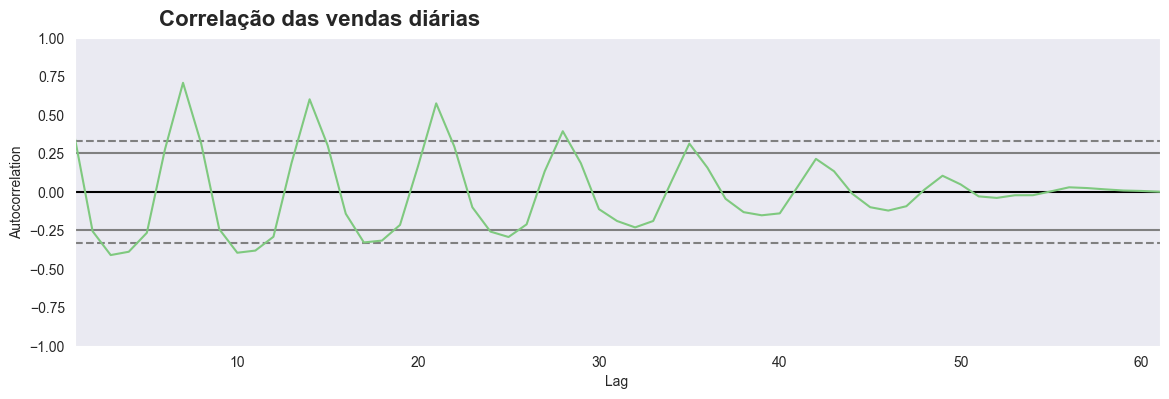

In [53]:
ax = plt.figure(figsize=(14,4))
ax.suptitle('Correlação das vendas diárias', fontsize=16, weight = 'bold', x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

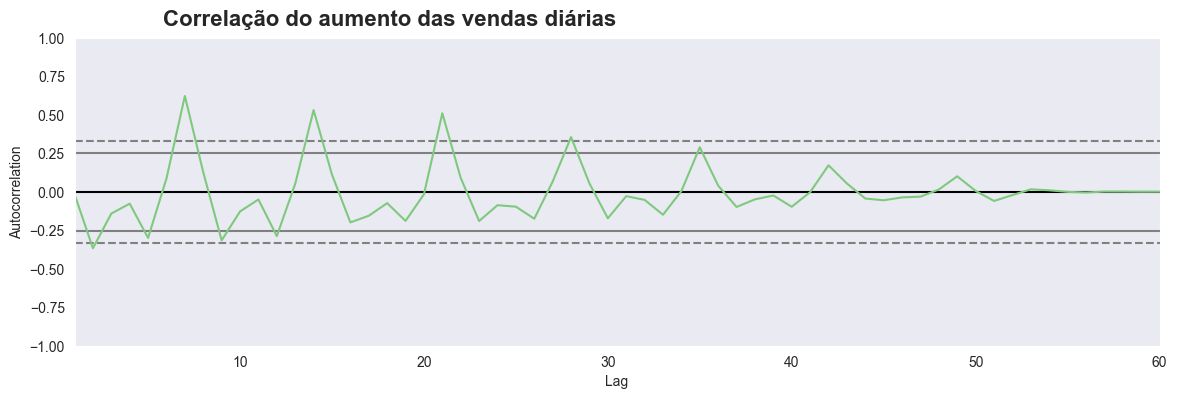

In [54]:
ax = plt.figure(figsize=(14,4))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=16, weight = 'bold', x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

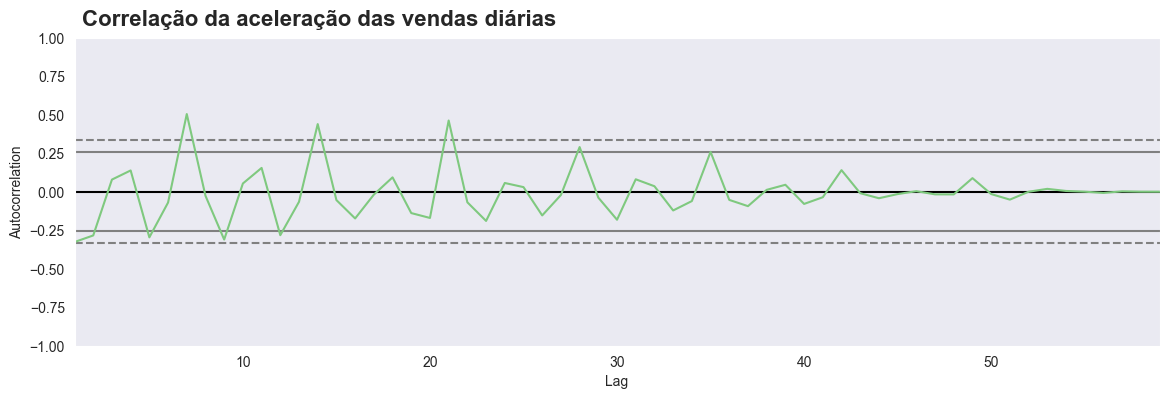

In [55]:
ax = plt.figure(figsize=(14,4))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=16, weight = 'bold', x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Analisálise de vendas Cafeteria

In [56]:
cafe = pd.read_csv('dados/cafelura.csv')
cafe.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [57]:
cafe.dtypes

mes       object
vendas     int64
dtype: object

In [58]:
cafe['mes'] = pd.to_datetime(cafe['mes'])
cafe.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [59]:
print(f'Quantidade de linhas e colunas: {cafe.shape}')
print(f'Quantidade de dados nulos: {cafe.isna().sum().sum()}')

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


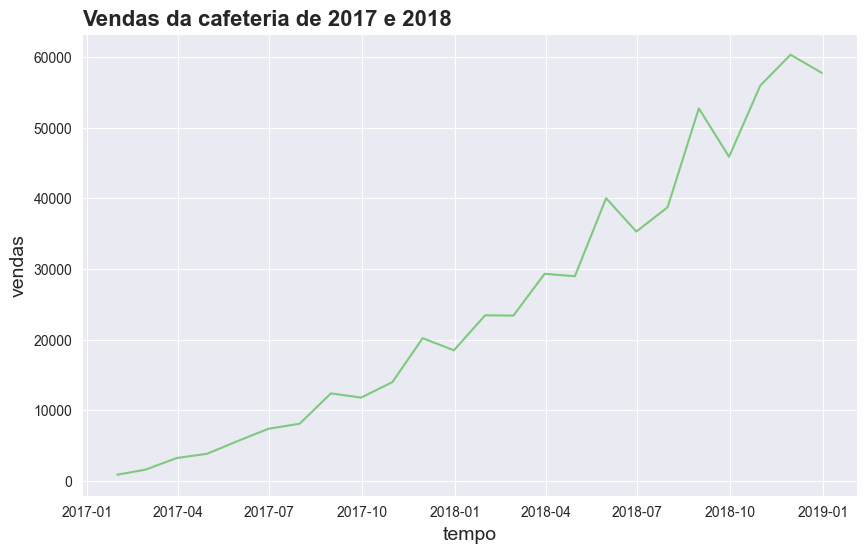

In [60]:
plotar('Vendas da cafeteria de 2017 e 2018', 'tempo', 'vendas',
       'mes', 'vendas', cafe)

In [61]:
quantidade_dias_fds = pd.read_csv('dados/dias_final_de_semana.csv')
quantidade_dias_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [62]:
quantidade_dias_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [63]:
cafe['vendas_normalizadas'] = cafe['vendas'] / quantidade_dias_fds['quantidade_de_dias'].values
cafe.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


In [64]:
cafe.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


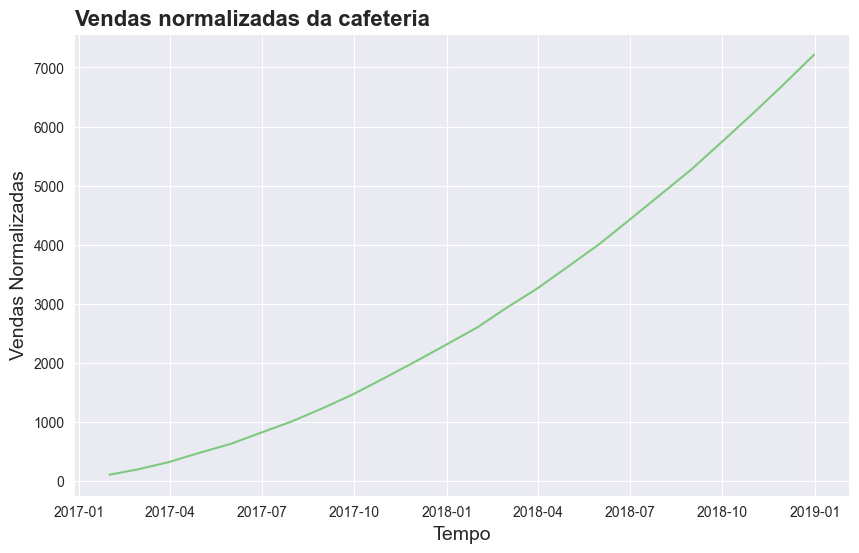

In [65]:
plotar('Vendas normalizadas da cafeteria',
       'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafe)

<Axes: title={'center': 'Vendas Normalizadas Cafeteria - 2017 a 2018'}, xlabel='mes', ylabel='vendas_normalizadas'>

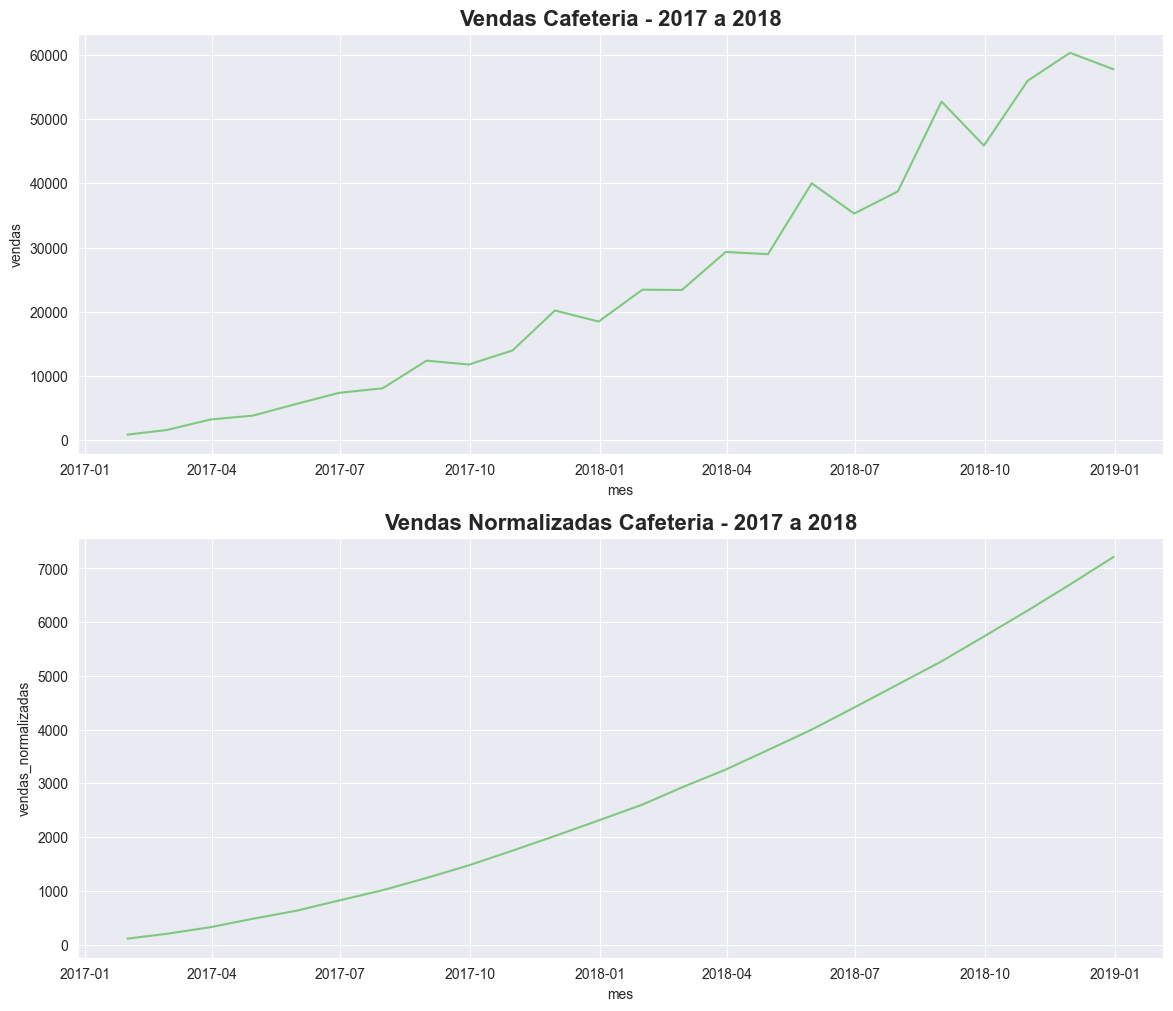

In [66]:
plt.figure(figsize=(14,12))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafeteria - 2017 a 2018', fontsize = 16, weight = 'bold')
sns.lineplot(x='mes', y='vendas', data=cafe)

ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafeteria - 2017 a 2018', fontsize = 16, weight = 'bold')
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafe)

# Statsmodels

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

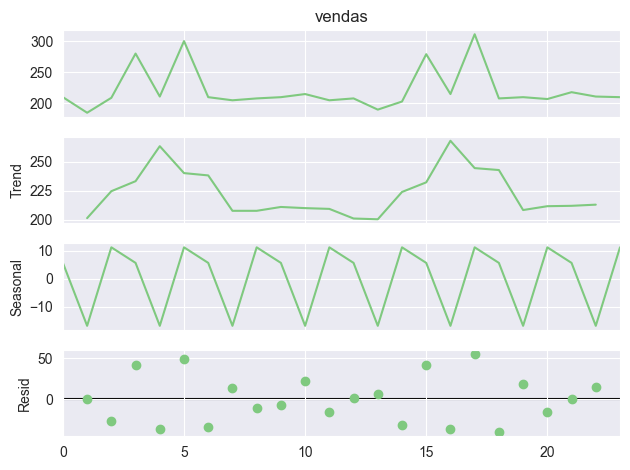

In [74]:
resultado = seasonal_decompose(chocolate['vendas'], period=3)
ax = resultado.plot()

In [75]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [76]:
data = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


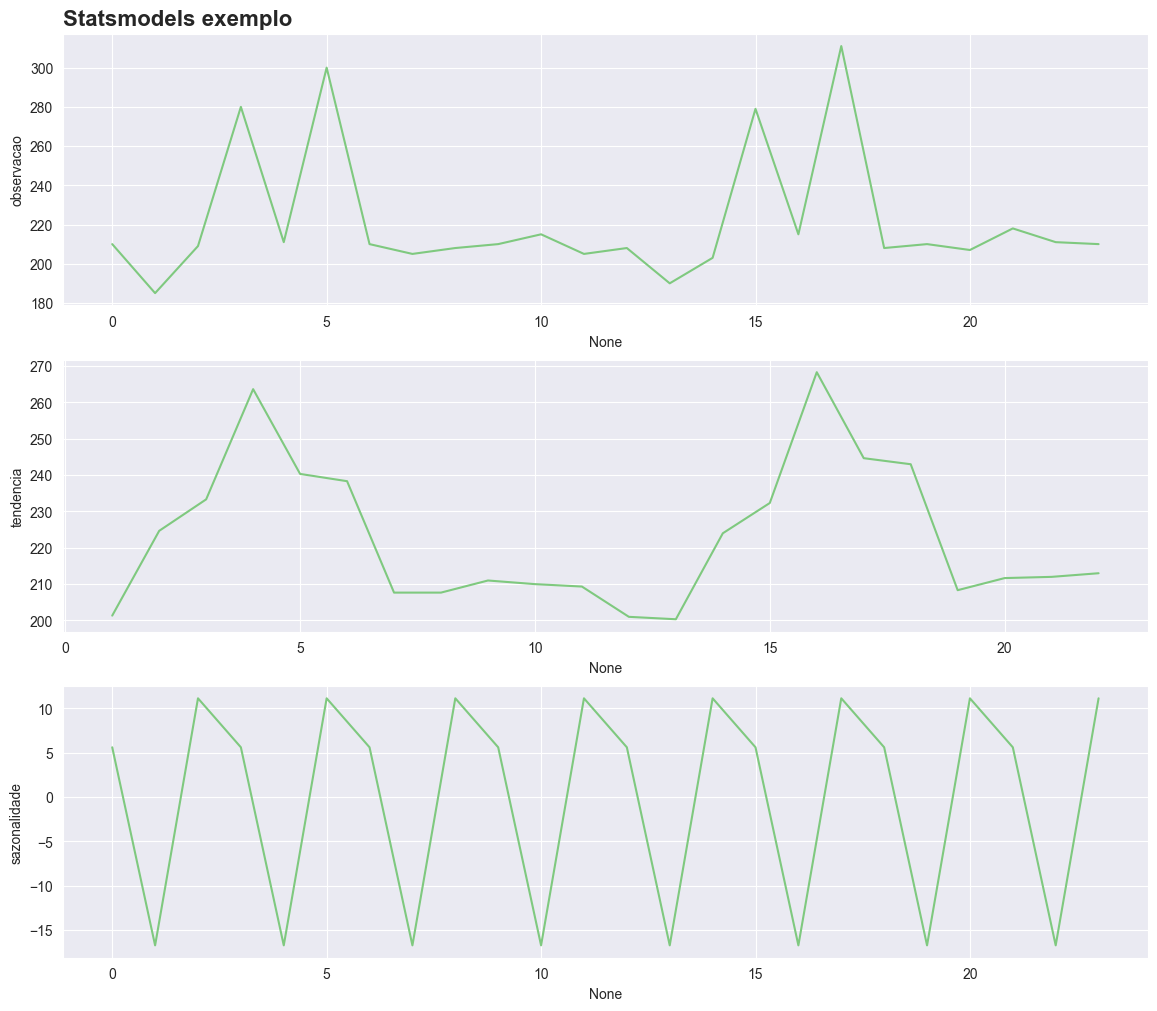

In [80]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', 
                resultado, 'Statsmodels exemplo')